# Data Analysis Interview Challenge

In [687]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

from datetime import datetime as dt

In [688]:
# set plot style
plt.rcParams['font.family'] = "serif"

# Part 1 - Exploratory data analysis

Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

Data description

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYYMMDD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

In [689]:
import os
cwd = os.getcwd()

In [690]:
# load json into python dict of login times
l = open(f'{cwd}/data/logins.json')
logins = json.load(l)

In [691]:
# load json into python dict of challenge data
d = open(f'{cwd}/data/ultimate_data_challenge.json')
challenge_data = json.load(d)

In [692]:
data_df = pd.DataFrame.from_dict(challenge_data)

In [693]:
data_df.head(5)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [694]:
# create df for easier indexing
logins_df = pd.DataFrame.from_dict(logins)

In [695]:
logins_df1 = logins_df.copy()

In [696]:
logins_df.head(5)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [697]:
# aggregate logins based on 15 min time intervals

print(f"Login time min: {logins_df['login_time'].min()}") 
print(f"Login time max: {logins_df['login_time'].max()}")

Login time min: 1970-01-01 20:12:16
Login time max: 1970-04-13 18:57:38


In [698]:
logins_df['count'] = 1
logins_df['login_time'] = pd.to_datetime(logins_df['login_time'])

The json file had dates out of order. Potential data quality issue.

In [699]:
sorted_logins = logins_df.sort_values(by='login_time').reset_index(drop=True)

In [700]:
sorted_logins.head(5)

,login_time,count
0,1970-01-01 20:12:16,1
1,1970-01-01 20:13:18,1
2,1970-01-01 20:16:10,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:16:37,1


In [701]:
logins_df.rename(columns={'login_time':'login_interval'}, inplace=True)

In [702]:
logins_df.set_index('login_interval', inplace=True)

In [703]:
# aggregate df into 15 min datetime index and counts
interval_idx = logins_df.groupby(pd.Grouper(axis=0, level=0, freq='15min')).sum()


In [704]:
interval_idx.head(5)

,count
login_interval,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [705]:
intervals_df = interval_idx.copy().reset_index()

In [706]:
intervals_df['date'] = pd.to_datetime(intervals_df['login_interval']).dt.date
intervals_df['month'] = pd.to_datetime(intervals_df['login_interval']).dt.month
intervals_df['time_interval'] = pd.to_datetime(intervals_df['login_interval']).dt.time

intervals_df['num_logins'] = intervals_df['count']
intervals_df.drop(columns=['login_interval', 'count'], axis=0, inplace=True)

In [707]:
intervals_df.head(5)

,date,month,time_interval,num_logins
0,1970-01-01,1,20:00:00,2
1,1970-01-01,1,20:15:00,6
2,1970-01-01,1,20:30:00,9
3,1970-01-01,1,20:45:00,7
4,1970-01-01,1,21:00:00,1


In [709]:
# visualize and describe resulting time series to best characterize underlying pattern of demand (when are there more or less logins)

# report/illustrate important features (such as daily cycles [can plot])



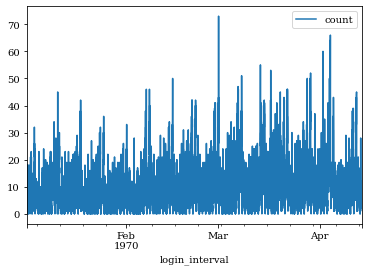

In [710]:
# loop through and plot each month - all dates 1970 - Jan - April
interval_idx.plot(y='count')
plt.show()

clearly some pattern

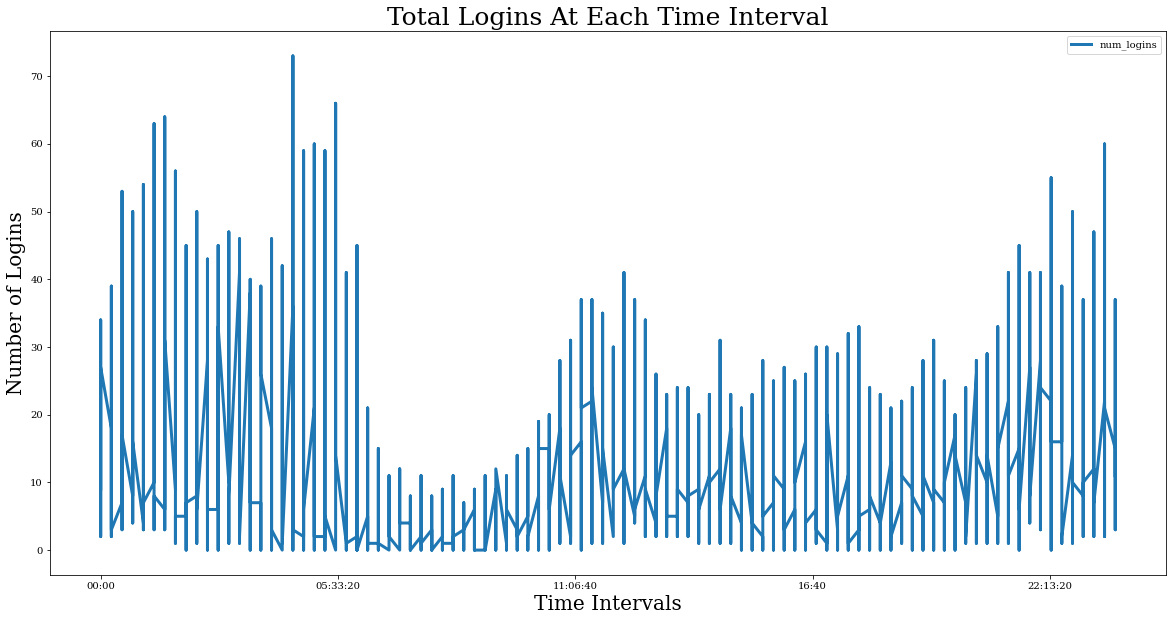

In [711]:
intervals_df.plot(x='time_interval', y='num_logins', figsize=(20,10), kind='line', linewidth=3)
plt.title('Total Logins At Each Time Interval', fontsize=25)
plt.xlabel('Time Intervals', fontsize=20)
plt.ylabel('Number of Logins', fontsize=20)
plt.show()

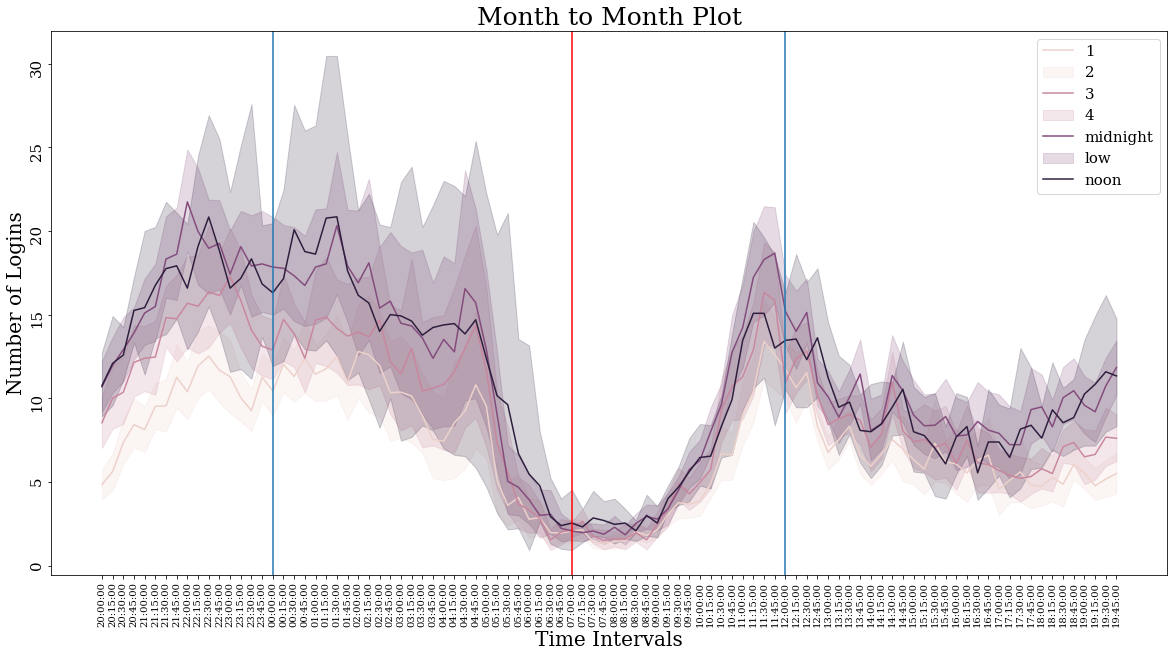

In [712]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.lineplot(data=intervals_df, x=intervals_df['time_interval'].astype(str),
                  y='num_logins', hue='month')
plt.title('Month to Month Plot', fontsize=25)
plt.xlabel('Time Intervals', fontsize=20)
plt.xticks(fontsize=10)
plt.ylabel('Number of Logins', fontsize=20)
plt.yticks(fontsize=15)
ax.tick_params(labelrotation=90)
ax.axvline('00:00:00', label='midnight')
ax.axvline('07:00:00', label='low (7:00)', color='r')
ax.axvline('12:00:00', label='noon')
labels = {1:'January', 2:'February', 3:'March', 4:'April', 'midnight':'Midnight', 'low':'Low (7:00)', 'noon':'Noon'}
plt.legend(labels=labels, fontsize=15)
plt.show()

The number of logins follows a daily cyclic pattern but number of logins at each time also increases as the months continue on.

Login counts decrease between roughly 5:00 and 8:00, increasing to end the lull in a peak at around 11:30.

The largest number of logins occur during roughly 20:00 and 5:00.

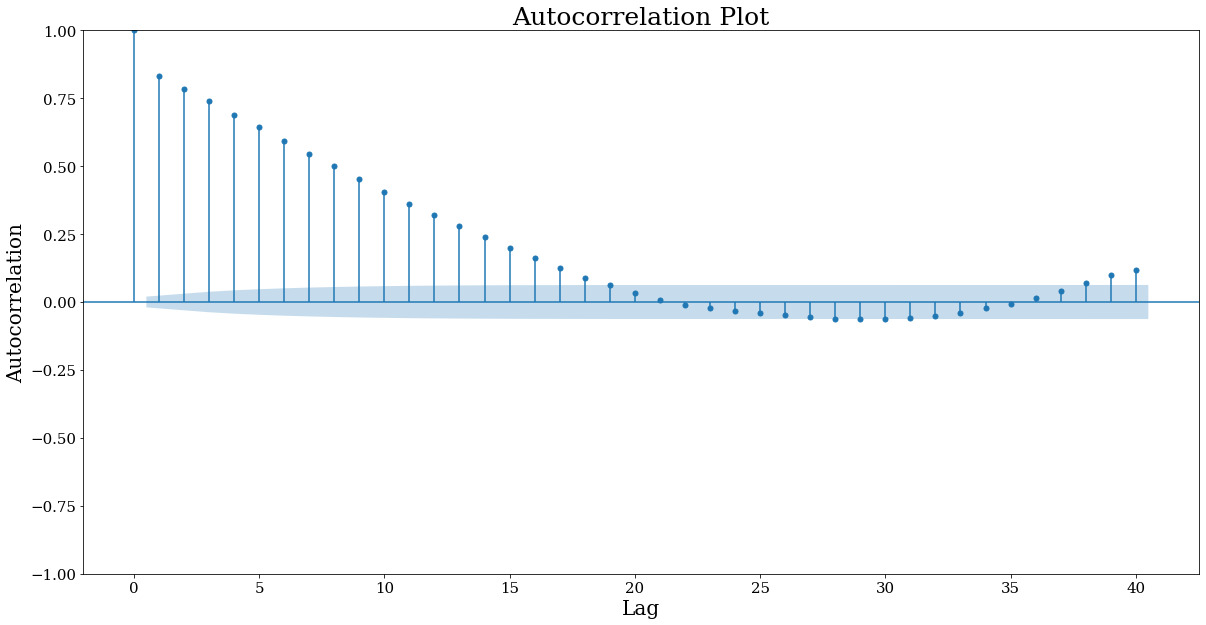

In [733]:
from statsmodels.graphics.tsaplots import plot_acf, month_plot

fig, ax = plt.subplots(figsize=(20,10))
plot_acf(interval_idx, ax=ax)
plt.title('Autocorrelation Plot', fontsize=25)
plt.xlabel('Lag', fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Autocorrelation', fontsize=20)
plt.yticks(fontsize=15)
#plt.fill_between(y, 0.75, -0.75)
plt.show()

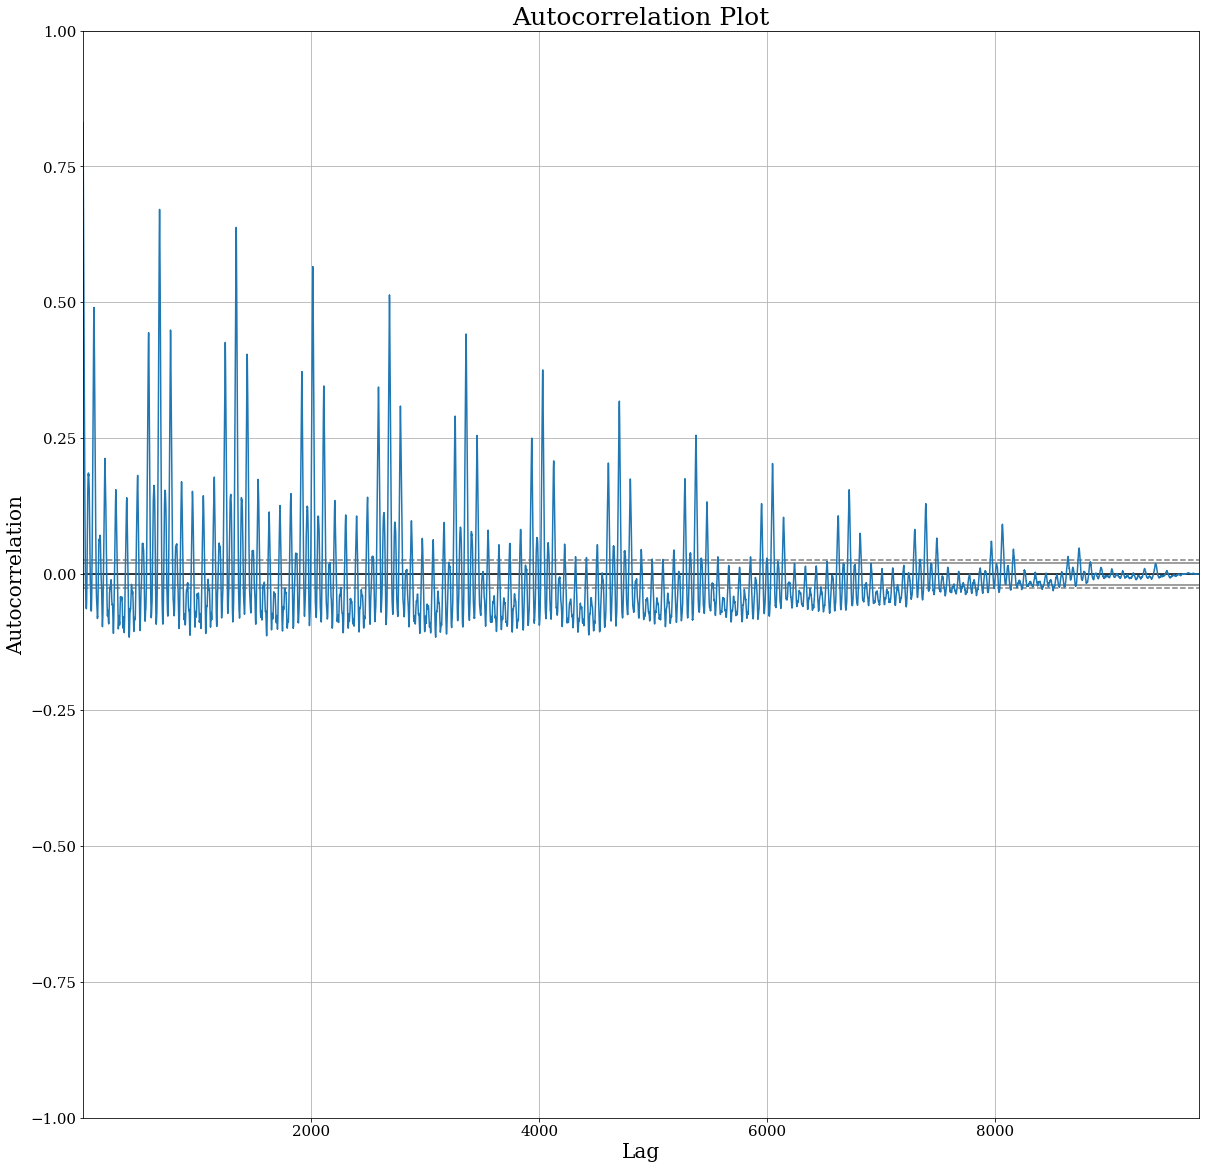

In [734]:
from pandas.plotting import autocorrelation_plot

fig, ax = plt.subplots(figsize=(20,20))
plt.title('Autocorrelation Plot', fontsize=25)
plt.xlabel('Lag', fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Autocorrelation', fontsize=20)
plt.yticks(fontsize=15)
autocorrelation_plot(interval_idx)
plt.show()

In [735]:
# add days of the week column 1970-01-01 was a Thursday

intervals_df['date'] = pd.to_datetime(intervals_df['date'])
weekdays = []
for i in range(len(intervals_df)):
    date = intervals_df['date'][i]
    weekday = dt.weekday(date)
    weekdays.append(weekday)


In [736]:
intervals_df['weekday'] = weekdays

In [737]:
# map weekday numbers to names in new column
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
intervals_df['day_of_week'] = intervals_df['weekday'].map(days)


In [738]:
intervals_df.head(5)

,date,month,time_interval,num_logins,weekday,day_of_week
0,1970-01-01,1,20:00:00,2,3,Thursday
1,1970-01-01,1,20:15:00,6,3,Thursday
2,1970-01-01,1,20:30:00,9,3,Thursday
3,1970-01-01,1,20:45:00,7,3,Thursday
4,1970-01-01,1,21:00:00,1,3,Thursday


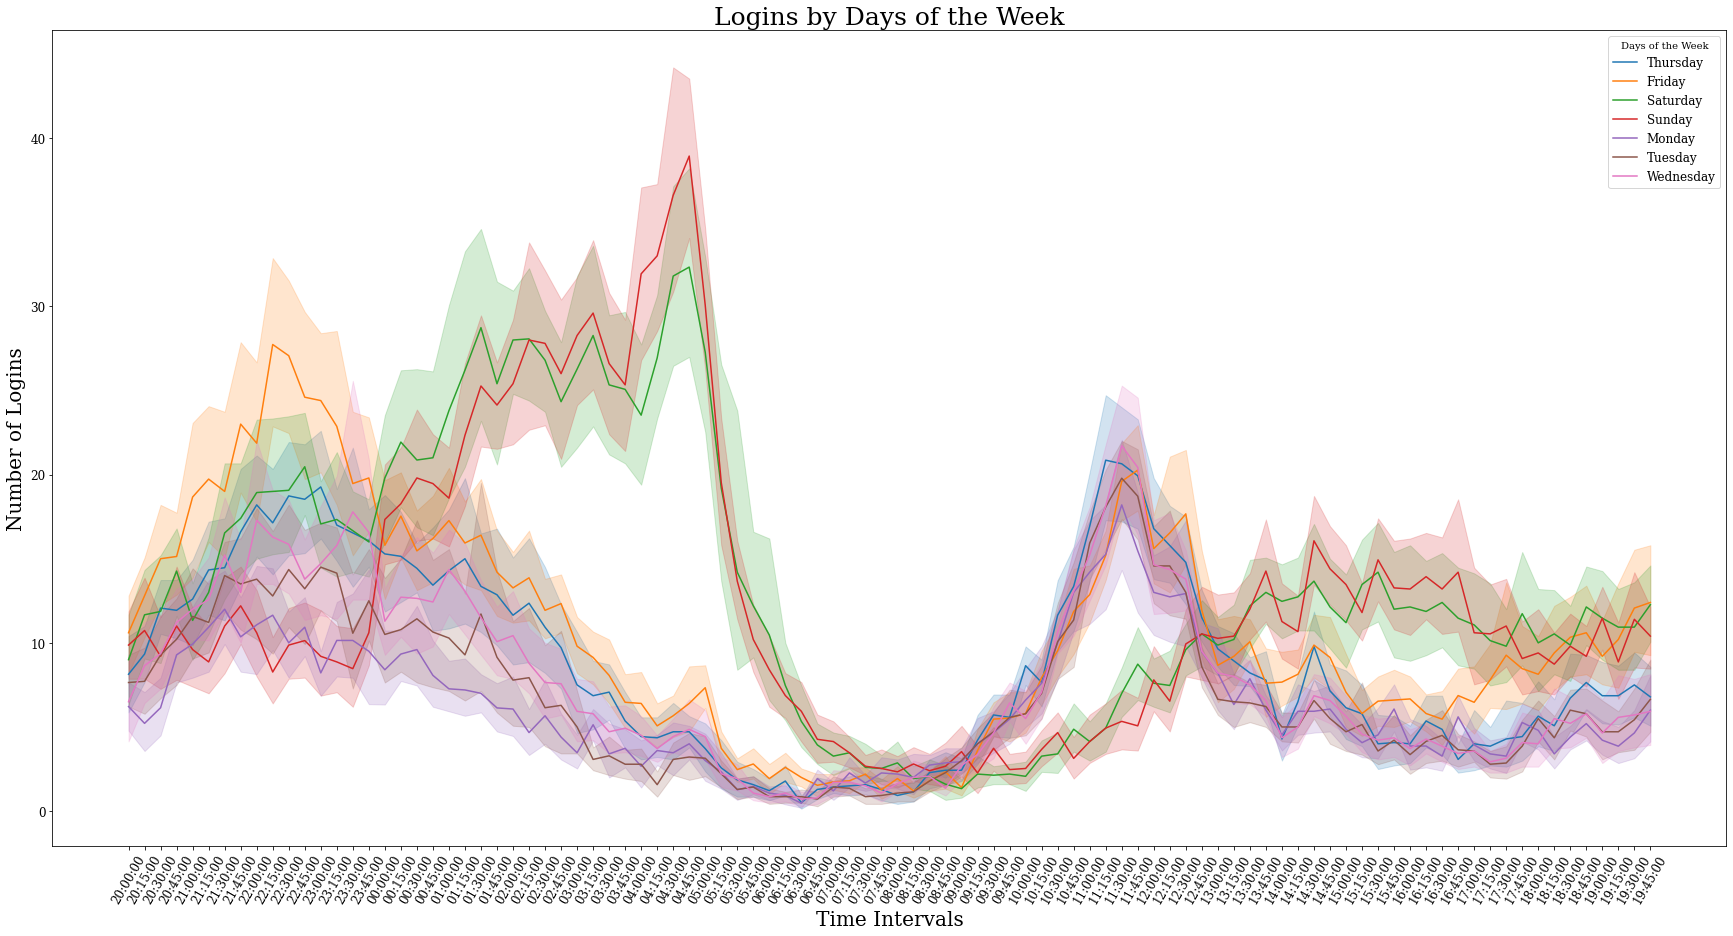

In [758]:
fig, ax = plt.subplots(figsize=(30,15))
ax = sns.lineplot(data=intervals_df, x=intervals_df['time_interval'].astype(str),
                  y='num_logins', hue='day_of_week')
plt.title('Logins by Days of the Week', fontsize=25)
plt.xlabel('Time Intervals', fontsize=20, labelpad=4)
plt.xticks(fontsize=12, rotation=60)
plt.ylabel('Number of Logins', fontsize=20)
plt.yticks(fontsize=12)
plt.legend(title='Days of the Week', fontsize=12)
plt.show()

Daily cycle differs somewhat between days of the week. 
A greater number of total logins occurred between 00:00 (midnight) to 5:00 on Saturday and Sunday, compared to the rest of the dyas of the week.
A greater number of total logins occurred between 9:00 to 12:00 (noon) on weekdays.

Could possibly be due to a difference in sleep schedule? 

# Part 2 - Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a) how you will implement the experiment
b) what statistical test(s) you will conduct to verify the significance of the observation
c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.
Note: The two cities of Gotham and Metropolis are not in the provided dataset; however, you do not need this information to answer Part 2.

# Part 3 - Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).